In [158]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
%matplotlib inline

In [159]:
def get_historic_price(symbol, exchange='coinbase', after='2016-04-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={'periods': time_interval, 'after': str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result'][time_interval], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [160]:
time_interval = '3600'   # Minute: 60, Hour: 3600, 4-Hours: 14400,  Day: 86400
time_length = 100         #time length going back from today in days
coinname = 'xrp'
exchange = 'ftx'

from_when = (pd.Timestamp.now() - pd.offsets.Day(time_length))
coin = get_historic_price(coinname, exchange, after=from_when)
coin = coin.drop(['NA'], axis=1)
coin_perc = coin.pct_change()*100
df = pd.merge(left=coin, right=coin_perc, left_index=True, right_index=True)
df = df.rename(columns={"OpenPrice_y":"OpenPrice_%", "HighPrice_y":"HighPrice_%", "LowPrice_y":"LowPrice_%", "ClosePrice_y":"ClosePrice_%", "Volume_y":"Volume_%"})
#close_change = df.iloc[-1]['ClosePrice_%'] 
df.tail(3)

,OpenPrice_x,HighPrice_x,LowPrice_x,ClosePrice_x,Volume_x,OpenPrice_%,HighPrice_%,LowPrice_%,ClosePrice_%,Volume_%
CloseTime,,,,,,,,,,
2021-04-23 19:00:00,1.069450,1.118200,1.064575,1.111400,942643,-2.697662,1.144227,1.075243,3.733433,349.955369
2021-04-23 20:00:00,1.110075,1.139775,1.098450,1.132100,1223562,3.798682,1.929440,3.182021,1.862516,29.801208
2021-04-23 21:00:00,1.134575,1.145350,1.133450,1.139275,51102,2.207058,0.489132,3.186308,0.633778,-95.823505


In [161]:
df.describe()

,OpenPrice_x,HighPrice_x,LowPrice_x,ClosePrice_x,Volume_x,OpenPrice_%,HighPrice_%,LowPrice_%,ClosePrice_%,Volume_%
count,2399.000000,2399.000000,2399.000000,2399.000000,2.399000e+03,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000
mean,0.613571,0.623326,0.603349,0.613881,5.162956e+05,0.076530,0.078595,0.082504,0.077094,127.250475
std,0.372191,0.381290,0.362228,0.372322,9.352800e+05,2.096577,2.221038,2.308287,2.108066,1139.626992
min,0.246400,0.251800,0.238125,0.245775,4.640000e+02,-20.424403,-25.380042,-26.460880,-19.988348,-99.673161
25%,0.434500,0.438738,0.428588,0.434963,8.289400e+04,-0.768333,-0.748876,-0.611180,-0.749922,-50.451434
50%,0.479500,0.484875,0.474600,0.479325,2.060480e+05,0.032683,-0.076248,0.158977,0.048451,-1.312468
75%,0.578712,0.587775,0.570488,0.578688,5.446115e+05,0.813975,0.674866,0.869015,0.808957,101.803937
max,1.938300,1.968575,1.890625,1.939750,1.247686e+07,23.196612,35.847209,22.657791,22.915875,46104.352332


<ipython-input-255-52ddb6419ac4>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


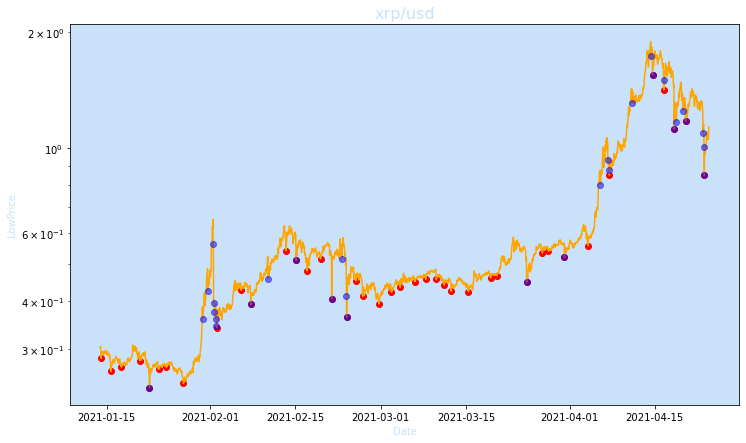

In [255]:
perc_drop = -6

df_lowprice = df[df['LowPrice_%']<=perc_drop]

plt.figure(figsize=(12, 7))
plt.yscale('log')
plt.xlabel('Date',size=10, color="#C9E2FA")     # set x-axis label and specific size
plt.ylabel('LowPrice',size=10, color="#C9E2FA")    # set y-axis label and specific size
plt.title(coinname+'/usd',size=16, color="#C9E2FA") # set plot title with specific size

n = 20  # number of points to be checked before and after
df['min'] = df.iloc[argrelextrema(df.LowPrice_x.values, np.less_equal, order=n)[0]]['LowPrice_x']
#df['max'] = df.iloc[argrelextrema(df.LowPrice_x.values, np.greater_equal, order=n)[0]]['LowPrice_x']

plt.plot(df.index, df.LowPrice_x, color='orange')
plt.plot(df_lowprice.LowPrice_x, 'bo', alpha=0.5)
plt.scatter(df.index, df['min'], c='r')  
#plt.scatter(df.index, df['max'], c='g')
ax = plt.axes() 
ax.set_facecolor("#C9E2FA") 
#plt.savefig('Plot_with_Matplotlib_in_Python.png', dpi=150) # save the plot as PNG file with dpi=150

In [198]:
df_lowprice.tail()

,OpenPrice_x,HighPrice_x,LowPrice_x,ClosePrice_x,Volume_x,OpenPrice_%,HighPrice_%,LowPrice_%,ClosePrice_%,Volume_%
CloseTime,,,,,,,,,,
2021-04-19 15:00:00,1.398300,1.398300,1.248875,1.300475,2493348,1.067924,-1.811671,-7.706093,-7.019269,-16.723262
2021-04-20 01:00:00,1.310725,1.327050,1.173800,1.240700,3316850,-1.146370,-1.572409,-9.657309,-5.342463,440.920699
2021-04-22 22:00:00,1.240150,1.248800,1.091025,1.188025,3430794,-4.625856,-3.997540,-10.736347,-4.092918,244.288887
2021-04-23 02:00:00,1.159925,1.177725,1.003925,1.059925,3010147,0.374264,-1.562990,-10.177377,-8.721581,113.150307
2021-04-23 03:00:00,1.061300,1.079325,0.848325,1.028750,5723885,-8.502705,-8.355091,-15.499166,-2.941246,90.153006


In [223]:
period_after = 72 #how many rows after price_drop are taken into consideration
d_buy_ins = []
for i in range(len(df_lowprice)):
    buy_in = df_lowprice.iloc[i].LowPrice_x
    my_row = (df_lowprice.iloc[i].name)
    idx = df.index.get_loc(my_row)
    max_price = df.iloc[idx+1:].head(period_after).HighPrice_x.max()
    perc_up = (max_price - buy_in) / buy_in * 100
    d_buy_ins.append({
        'Buy_In_Price': buy_in,
        'Buy_In_Date': my_row,
        'Max_Price': max_price,
        #'Max_Price_Date': df.iloc[idx+1:].head(period_after)[df.HighPrice_x==max_price].index.tolist(), #
        'Max_Price_Date': df[df.HighPrice_x==max_price].index.values[0],
        'Max_Perc_Gain': perc_up,
        'Total_Period': period_after,
        'Perc_Drop': perc_drop
    })
    #print(buy_in ,df_lowprice.iloc[i].name, max_price, df[df.HighPrice_x==max_price].index.values)
    #print('Max. percentage gain in period of', period_after, "hours after a min. drop of", perc_drop, "%:" , perc_up)
df_buy_ins = pd.DataFrame(d_buy_ins)

In [252]:
df_buy_ins.tail()

,Buy_In_Price,Buy_In_Date,Max_Price,Max_Price_Date,Max_Perc_Gain,Total_Period,Perc_Drop
26,1.248875,2021-04-19 15:00:00,1.474425,2021-04-20 11:00:00,18.060254,72,-6
27,1.173800,2021-04-20 01:00:00,1.474425,2021-04-20 11:00:00,25.611263,72,-6
28,1.091025,2021-04-22 22:00:00,1.216200,2021-04-22 23:00:00,11.473156,72,-6
29,1.003925,2021-04-23 02:00:00,1.174100,2021-04-23 12:00:00,16.950967,72,-6
30,0.848325,2021-04-23 03:00:00,1.174100,2021-04-23 12:00:00,38.402145,72,-6


In [226]:
df_buy_ins.describe()

,Buy_In_Price,Max_Price,Max_Perc_Gain,Total_Period,Perc_Drop
count,31.000000,31.000000,31.000000,31.0,31.0
mean,0.755969,0.969706,31.889089,72.0,-6.0
std,0.426537,0.507191,20.970547,0.0,0.0
min,0.238125,0.284000,9.153467,72.0,-6.0
25%,0.400537,0.558700,17.971556,72.0,-6.0
50%,0.519125,0.754925,25.611263,72.0,-6.0
75%,1.105475,1.345312,38.373909,72.0,-6.0
max,1.732950,1.968575,110.358760,72.0,-6.0


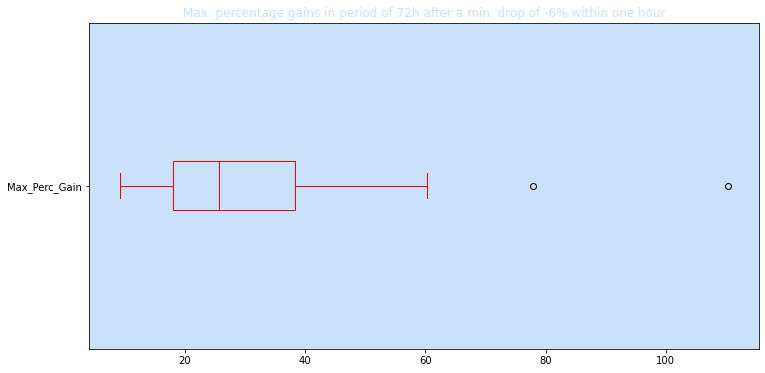

In [250]:
title = 'Max. percentage gains in period of '+ str(period_after) + "h after a min. drop of " + str(perc_drop) + "% within one hour"
plt.title(title, color='#C9E2FA')
df_buy_ins['Max_Perc_Gain'].plot(kind='box', figsize=(12,6), vert= False, color='red').set_facecolor("#C9E2FA")
